<a href="https://colab.research.google.com/github/bruna-calistrate/DataWrangling-DailyHappiness/blob/main/Case_2_Data_Enrichment_Daily_Happiness_%26_Employee_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enriquecimento dos dados

Após o tratamento realizado no primeiro case, vamos dar continuidade ao proesso de limpeza e estruturação do dataset que será utilizado no modelo preditivo. 

Aqui, iremos enriquecer os dados através de combinação, criação de dimensões, box-cox e discretização.

## Importar bibliotecas

In [152]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

## Importar arquivos 

### **churn_merge**

Descrição do status e comportamento do funcionário, se continua na empresa, última participação na pesquisa, padrão de votação e comentários
**Tamanho**: 25 colunas e 4032 linhas
* **companyAlias**: código hash da empresa
  * tipo object, sem valores nulos
* **employee**: número do funcionário (1-999)
  * tipo int, sem valores nulos
* **stillExists**: informa se o funcionário ainda está na empresa (0-1)
  * tipo int, sem valores nulos
* **lastParticipationDate**: data da última participação na pesquisa
  * tipo object, deve ser convertido para datetime, sem valores nulos
* **vote.mean**: média de votos do funcionário (1-4)
  * tipo float, sem valores nulos
* **vote.mode**: moda dos votos do funcionário (1-4)
  * tipo int, sem valores nulos
* **vote.min**: menor nota atribuída pelo funcionário (1-4)
  * tipo int, sem valores nulos
* **vote.max**: maior nota atribuída pelo funcionário (2-4)
  * tipo int, sem valores nulos
* **vote.count**: quantidade de votos por funcionário (1-275)
  * tipo int, sem valores nulos
* **diffDaysVote.min**: menor diferença em dias entre a última participação e o voto (0-0)
  * tipo int, sem valores nulos
  * pouco representativo, pode ser excluído
* **diffDaysVote.max**: máxima diferença em dias entre a última participação e o voto (0-572)
  * tipo int, sem valores nulos
* **diffDaysVote.median**: diferença mediana de dias entre a última participação e o voto (0-330.5)
  * tipo float, sem valores nulos
* **likes.mean**: média de likes nos comentários do funcionário (0-20.6)
  * tipo float, sem valores nulos
* **likes.min**: menor quantidade de likes nos comentários do funcionário (0-12)
  * tipo float, sem valores nulos
* **likes.max**: maior quantidade de lilkes nos comentários do funcionário (0-45)
  * tipo float, sem valores nulos
* **dislikes.mean**: média de dislikes nos comentários do funcionário (0-5.7)
  * tipo float, sem valores nulos
* **dislikes.min**: menor quantidade de dislikes nos comentários do funcionário (0-3)
  * tipo float, sem valores nulos
* **dislikes.max**: maior quantidade de dislikes nos comentários do funcionário (0-18)
  * tipo float, sem valores nulos
* **carac.mean**: média de caracteres nos comentários do funcionário (0.8-283)
* **carac.min**: menor quantidade de caracteres nos comentários do funcionário (0-146)
  * tipo float, sem valores nulos
* **carac.max**: maior quantidade de caracteres nos comentários do funcionário (1-1770)
  * tipo float, sem valores nulos
* **diffDaysComment.min**: menor diferença em dias entre a última participação e o comentário (0-210)
  * tipo float, sem valores nulos
* **diffDaysComment.max**: maior diferença em dias entre a última participação e o  comentário (0-473)
  * tipo float, sem valores nulos
* **diffDaysComment.median**: diferença mediana em dias entre a última participação e o comentário (0-352)
  * tipo float, sem valores nulos
* **commentId.count**: quantidade de comentários por funcionário (0-59)
  * tipo float, sem valores nulos

In [153]:
churn_merge = pd.read_csv('https://raw.githubusercontent.com/bruna-calistrate/DataWrangling-DailyHappiness/main/clean-data/churn_merge.csv').iloc[:,1:]

churn_merge.head(3)

,companyAlias,employee,stillExists,lastParticipationDate,vote.mean,vote.mode,vote.min,vote.max,vote.count,diffDaysVote.min,...,dislikes.mean,dislikes.min,dislikes.max,carac.mean,carac.min,carac.max,diffDaysComment.min,diffDaysComment.max,diffDaysComment.median,commentId.count
0,5370af43e4b0cff95558c12a,18,1,2017-03-12 01:00:00,3.192118,3,1,4,203,0,...,0.580000,0.0,3.0,51.24,14.0,139.0,37.0,382.0,326.0,50.0
1,5370af43e4b0cff95558c12a,20,1,2016-12-16 01:00:00,3.666667,4,2,4,51,0,...,0.200000,0.0,1.0,8.20,0.0,30.0,16.0,238.0,27.0,5.0
2,5370af43e4b0cff95558c12a,21,1,2016-12-27 01:00:00,3.680556,4,3,4,72,0,...,0.333333,0.0,2.0,53.00,8.0,168.0,5.0,308.0,268.0,12.0


In [154]:
churn_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   companyAlias            4032 non-null   object 
 1   employee                4032 non-null   int64  
 2   stillExists             4032 non-null   int64  
 3   lastParticipationDate   4032 non-null   object 
 4   vote.mean               4032 non-null   float64
 5   vote.mode               4032 non-null   int64  
 6   vote.min                4032 non-null   int64  
 7   vote.max                4032 non-null   int64  
 8   vote.count              4032 non-null   int64  
 9   diffDaysVote.min        4032 non-null   int64  
 10  diffDaysVote.max        4032 non-null   int64  
 11  diffDaysVote.median     4032 non-null   float64
 12  likes.mean              4032 non-null   float64
 13  likes.min               4032 non-null   float64
 14  likes.max               4032 non-null   

In [155]:
churn_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
employee,4032.0,192.212054,205.965350,1.00,51.000000,131.000000,243.000000,999.000000
stillExists,4032.0,0.860119,0.346906,0.00,1.000000,1.000000,1.000000,1.000000
vote.mean,4032.0,2.960151,0.633997,1.00,2.666667,3.000000,3.333333,4.000000
vote.mode,4032.0,2.986607,0.825252,1.00,3.000000,3.000000,4.000000,4.000000
vote.min,4032.0,1.911706,0.948771,1.00,1.000000,2.000000,3.000000,4.000000
vote.max,4032.0,3.716518,0.510612,2.00,3.000000,4.000000,4.000000,4.000000
vote.count,4032.0,45.905506,57.910857,1.00,6.000000,20.000000,65.000000,275.000000
diffDaysVote.min,4032.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
diffDaysVote.max,4032.0,136.478671,133.881934,0.00,21.000000,107.500000,208.000000,572.000000
diffDaysVote.median,4032.0,73.406746,73.931964,0.00,10.500000,55.000000,113.625000,330.500000


### **churn_plus** 
Informações enriquecidas com gênero dos funcionários e tipo de empresa

**Tamanho** - 4 colunas e 4064 linhas
* **employee**: número do funcionário (1-999)
  * tipo int, sem valores nulos
* **companyAlias**: código hash da empresa
  * tipo object, sem valores nulos
* **companyType**: tipo de empresa
  * tipo object, sem valores nulos
* **gender**: gênero do funcionário (Female, Male)
  * tipo object, sem valores nulos


In [156]:
churn_plus = pd.read_csv('https://raw.githubusercontent.com/bruna-calistrate/DataWrangling-DailyHappiness/main/clean-data/df_churn_enriq.csv',
                         usecols=['employee', 
                                  'companyAlias',
                                  'gender', 
                                  'companyType'])
churn_plus.head(3)

,employee,companyAlias,companyType,gender
0,512,56aec740f1ef260003e307d6,Product,Male
1,2,56aec740f1ef260003e307d6,Product,Male
2,487,56aec740f1ef260003e307d6,Product,Female


In [157]:
churn_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4064 entries, 0 to 4063
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   employee      4064 non-null   int64 
 1   companyAlias  4064 non-null   object
 2   companyType   4064 non-null   object
 3   gender        4064 non-null   object
dtypes: int64(1), object(3)
memory usage: 127.1+ KB


In [158]:
churn_plus.describe().T

,count,mean,std,min,25%,50%,75%,max
employee,4064.0,192.518455,206.118146,1.0,51.0,131.0,244.0,999.0


### **comments_clean** 
Comentário dos funcionários após votação, explicando o seu sentimento e a reação dos colegas

**Tamanho** - 7 colunas e 38993 linhas
* **employee**: número do funcionário (1-999)
  * tipo int, sem valores nulos
* **companyAlias**: código hash da empresa
  * tipo object, sem valores nulos
* **commentId**: código hash do comentário
 * tipo object, sem valores nulos
* **likes**: quantidade de curtidas (0-86)
  * tipo int, sem valores nulos
* **dislikes**: quantidade de descurtidas (0-53)
  * tipo int, sem valores nulos
* **commentDate**: data de postagem do comentário
  * tipo object deve ser convertido para datetime, sem valores nulos
* **carac**: quantidade de caracteres dos comentários (0-29057)
  * tipo int, sem valores nulos

In [159]:
comments_clean = pd.read_csv('https://raw.githubusercontent.com/bruna-calistrate/DataWrangling-DailyHappiness/main/clean-data/comments_clean_anonimized_clean.csv').iloc[:,1:]
comments_clean.head(3)

,employee,companyAlias,commentId,likes,dislikes,commentDate,carac
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,4,0,2017-03-20 19:00:17,62
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,1,2,2017-03-20 18:55:16,29
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,3,0,2017-03-20 16:44:02,27


In [160]:
comments_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38993 entries, 0 to 38992
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   employee      38993 non-null  int64 
 1   companyAlias  38993 non-null  object
 2   commentId     38993 non-null  object
 3   likes         38993 non-null  int64 
 4   dislikes      38993 non-null  int64 
 5   commentDate   38993 non-null  object
 6   carac         38993 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.1+ MB


In [161]:
comments_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
employee,38993.0,150.951248,157.277902,1.0,38.0,112.0,207.0,999.0
likes,38993.0,7.002488,7.773628,0.0,2.0,4.0,10.0,86.0
dislikes,38993.0,1.297977,2.748012,0.0,0.0,0.0,1.0,53.0
carac,38993.0,102.140128,202.662014,0.0,27.0,57.0,118.0,29057.0


### **interactions_clean** 

Interações dos funcionários com os comentários de outros colegas da empresa.

**Tamanho** - 5 colunas e 324.471 linhas
* **employee**: número do funcionário (1-999)
 * tipo int, sem valores nulos
* **companyAlias**: código hash da empresa
 * tipo object, sem valores nulos
* **liked**: sem ou com curtida (0-1)
 * tipo int, sem valores nulos
* **disliked**: sem ou com descurtida (0-1)
 * tipo int, sem valores nulos
* **commentId**: código do comentário
 * tipo object, sem valores nulos

In [162]:
interactions_clean = pd.read_csv('https://raw.githubusercontent.com/bruna-calistrate/DataWrangling-DailyHappiness/main/clean-data/commentInteractions_clean.csv').iloc[:,1:]
interactions_clean.head(3)

,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070


In [163]:
interactions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324471 entries, 0 to 324470
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   employee      324471 non-null  int64 
 1   companyAlias  324471 non-null  object
 2   liked         324471 non-null  int64 
 3   disliked      324471 non-null  int64 
 4   commentId     324471 non-null  object
dtypes: int64(3), object(2)
memory usage: 12.4+ MB


In [164]:
interactions_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
employee,324471.0,172.173411,178.699301,1.0,45.0,128.0,214.0,999.0
liked,324471.0,0.843696,0.363144,0.0,1.0,1.0,1.0,1.0
disliked,324471.0,0.156304,0.363144,0.0,0.0,0.0,0.0,1.0


## Tratamento inicial de dados

Correção de variáveis e merge de **gender** e **companyType** na base de **churn_merge**

In [165]:
churn_merge.drop(columns=['diffDaysVote.min'], inplace=True)
churn_merge['lastParticipationDate'] = pd.to_datetime(
    churn_merge['lastParticipationDate'], infer_datetime_format=True
    )
churn_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   companyAlias            4032 non-null   object        
 1   employee                4032 non-null   int64         
 2   stillExists             4032 non-null   int64         
 3   lastParticipationDate   4032 non-null   datetime64[ns]
 4   vote.mean               4032 non-null   float64       
 5   vote.mode               4032 non-null   int64         
 6   vote.min                4032 non-null   int64         
 7   vote.max                4032 non-null   int64         
 8   vote.count              4032 non-null   int64         
 9   diffDaysVote.max        4032 non-null   int64         
 10  diffDaysVote.median     4032 non-null   float64       
 11  likes.mean              4032 non-null   float64       
 12  likes.min               4032 non-null   float64 

In [166]:
comments_clean['commentDate'] = pd.to_datetime(
    comments_clean['commentDate'], infer_datetime_format=True
    )
comments_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38993 entries, 0 to 38992
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   employee      38993 non-null  int64         
 1   companyAlias  38993 non-null  object        
 2   commentId     38993 non-null  object        
 3   likes         38993 non-null  int64         
 4   dislikes      38993 non-null  int64         
 5   commentDate   38993 non-null  datetime64[ns]
 6   carac         38993 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 2.1+ MB


In [167]:
churn = churn_merge.merge(churn_plus,
                          on=['companyAlias',
                              'employee'],
                          how='left')

In [168]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4067 entries, 0 to 4066
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   companyAlias            4067 non-null   object        
 1   employee                4067 non-null   int64         
 2   stillExists             4067 non-null   int64         
 3   lastParticipationDate   4067 non-null   datetime64[ns]
 4   vote.mean               4067 non-null   float64       
 5   vote.mode               4067 non-null   int64         
 6   vote.min                4067 non-null   int64         
 7   vote.max                4067 non-null   int64         
 8   vote.count              4067 non-null   int64         
 9   diffDaysVote.max        4067 non-null   int64         
 10  diffDaysVote.median     4067 non-null   float64       
 11  likes.mean              4067 non-null   float64       
 12  likes.min               4067 non-null   float64 

Por serem poucos valores nulos, será utilizado o método ffill

In [169]:
churn.fillna(method='ffill', inplace=True)

## Enriquecimento dos dados

### Combinação de variáveis

#### a) Calcular a razão de likes.mean e dislikes.mean

In [170]:
churn['likesRatio'] = churn['likes.mean'] / churn['dislikes.mean']

#### b) Verificar a existência de valores nulos e infinitos

In [171]:
churn.loc[churn['likesRatio'].isna()].shape

(106, 27)

In [172]:
churn.loc[churn['likesRatio'] == np.inf].shape

(622, 27)

#### c) Preencher nulos como 1

In [173]:
churn.loc[churn['likesRatio'].isna(), 'likesRatio'] = 1

In [174]:
churn.loc[churn['likesRatio'].isna()].shape

(0, 27)

#### d) Plotar histograma

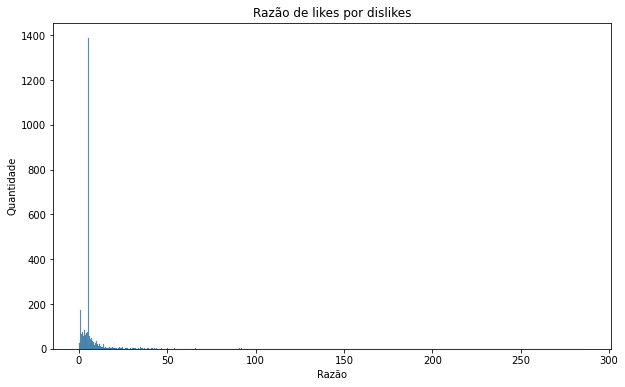

In [175]:
plt.figure(figsize=(10,6))

sns.histplot(data=churn,
             x='likesRatio')

plt.title("Razão de likes por dislikes")
plt.xlabel("Razão")
plt.ylabel('Quantidade')

plt.show()

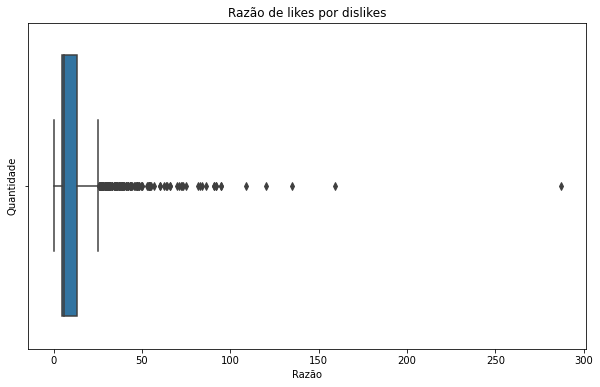

In [176]:
plt.figure(figsize=(10,6))

sns.boxplot(data=churn,
             x='likesRatio')

plt.title("Razão de likes por dislikes")
plt.xlabel("Razão")
plt.ylabel('Quantidade')

plt.show()

#### e) Como ela possui picos indesejados e uma cauda muito longa, aplicar a discretização por equal-frequency utilizando 3 bins

Primeiro, atribuir um valor alto para os infinitos

In [177]:
churn.loc[churn['likesRatio'] == np.inf, 'likesRatio'] = 300

In [178]:
churn['likesRatio'].describe()

count    4067.000000
mean       52.648411
std       105.621990
min         0.000000
25%         5.000000
50%         5.670908
75%        13.180556
max       300.000000
Name: likesRatio, dtype: float64

In [179]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3,
                               encode='ordinal',
                               strategy='quantile')

discretizer.fit(churn[['likesRatio']].values)

churn['likesRatio.d'] = discretizer.transform(churn[['likesRatio']]
                                              .values)

#### f) Visualize a nova distribuição

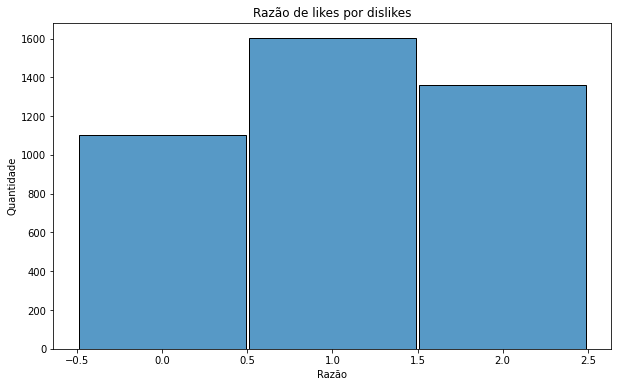

In [180]:
plt.figure(figsize=(10,6))

sns.histplot(data=churn,
             x='likesRatio.d',
             discrete=True,
             shrink=.98)

plt.title("Razão de likes por dislikes")
plt.xlabel("Razão")
plt.ylabel('Quantidade')


plt.show()

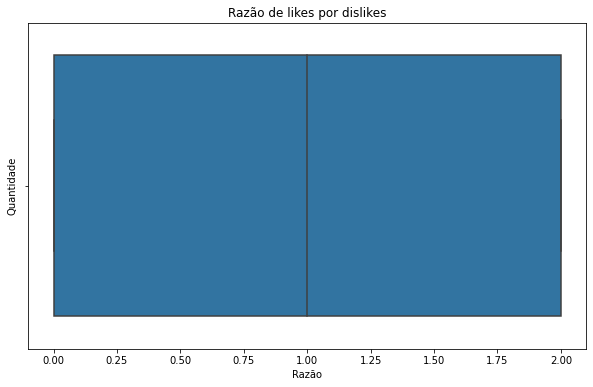

In [181]:
plt.figure(figsize=(10,6))

sns.boxplot(data=churn,
             x='likesRatio.d')

plt.title("Razão de likes por dislikes")
plt.xlabel("Razão")
plt.ylabel('Quantidade')

plt.show()

### Criar nova dimensão
Vamos analizar os comentários, para isso será necessário calcular uma dimensão de comentários que indique se o autor do comentário saiu da empresa ou não.

Isso pode indicar que um funcionário que dê like em comentários de quem saiu da empresa pode ser mais propenso a sair também.

#### a) Fazer um merge entre **comments_clean** e **churn**, trazendo apenas o **stillExists**

In [182]:
comments = comments_clean.merge(churn[['companyAlias', 
                                       'employee', 
                                       'stillExists']],
                                on=['companyAlias',
                                    'employee'],
                                how='left')

Os valores nulos representam funcionários que não estão na base churn, então serão excluídos.

In [183]:
comments.shape

(39542, 8)

In [184]:
comments.loc[comments['stillExists'].isna()].shape

(4852, 8)

In [185]:
comments.dropna(axis='index', 
                how='any', 
                inplace=True)
comments.shape

(34690, 8)

In [186]:
comments.head(3)

,employee,companyAlias,commentId,likes,dislikes,commentDate,carac,stillExists
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,4,0,2017-03-20 19:00:17,62,1.0
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,1,2,2017-03-20 18:55:16,29,1.0
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,3,0,2017-03-20 16:44:02,27,1.0


#### b) Fazer um merge entre **interactions_clean** e **comments**, trazendo apenas o **stillExists**

Os valores nulos se referem a comentários inexistentes em **comments** e serão excluídos

In [187]:
interactions = interactions_clean.merge(comments[['commentId', 
                                                  'stillExists']],
                                        on=['commentId'],
                                        how='left')

In [188]:
interactions.shape

(330208, 6)

In [189]:
interactions.loc[interactions['stillExists'].isna()].shape

(55152, 6)

In [190]:
interactions.dropna(axis='index',
                    how='any',
                    inplace=True)
interactions.shape

(275056, 6)

In [191]:
interactions.head(3)

,employee,companyAlias,liked,disliked,commentId,stillExists
0,307,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070,1.0
1,36,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070,1.0
2,276,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070,1.0


#### c) Criar uma pivot table, calculando a média de stillExists para cada funcionário de acordo com liked e disliked

In [192]:
liked_comments = pd.pivot_table(interactions,
                                values='stillExists',
                                index=['companyAlias', 'employee'],
                                columns=['liked', 'disliked'],
                                aggfunc= np.mean,
                                fill_value= 0)

In [193]:
liked_comments.head(10)

liked                                     0         1
disliked                                  1         0
companyAlias             employee                    
5370af43e4b0cff95558c12a 18        0.444444  0.589912
                         20        0.000000  0.375000
                         21        0.125000  0.595238
                         22        0.500000  0.333333
                         23        0.500000  0.500000
                         24        0.500000  0.450704
                         25        0.590909  0.556738
                         26        0.000000  0.500000
                         27        0.428571  0.548387
                         28        0.666667  0.617647

In [194]:
liked_comments.columns = ['disliked', 'liked']

In [195]:
liked_comments.reset_index(inplace=True)
liked_comments.rename(columns={'liked': 'stillExists.meanLikedComments',
                               'disliked': 'stillExists.meanDislikedComments'},
                      inplace=True)

In [198]:
liked_comments.shape

(3123, 4)

In [197]:
liked_comments.head()

,companyAlias,employee,stillExists.meanDislikedComments,stillExists.meanLikedComments
0,5370af43e4b0cff95558c12a,18,0.444444,0.589912
1,5370af43e4b0cff95558c12a,20,0.000000,0.375000
2,5370af43e4b0cff95558c12a,21,0.125000,0.595238
3,5370af43e4b0cff95558c12a,22,0.500000,0.333333
4,5370af43e4b0cff95558c12a,23,0.500000,0.500000


#### d) Fazer um merge entre **churn** e **liked_comments**

In [199]:
churn.shape

(4067, 28)

In [200]:
churn = churn.merge(liked_comments,
                    on=['companyAlias', 'employee'],
                    how='left')

Os valores nulos se referem a funcionários que não comentaram, ou cujos comentários não tivem interações, portanto serão preenchidos por 0

In [204]:
churn.loc[churn['stillExists.meanDislikedComments'].isna()].shape

(1058, 30)

In [205]:
churn.loc[churn['stillExists.meanDislikedComments'].isna(), 
          ['stillExists.meanDislikedComments', 
           'stillExists.meanLikedComments']] = 0

In [206]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
employee,4067.0,192.624539,206.291948,1.00,51.000000,131.000000,244.000000,999.000000
stillExists,4067.0,0.854438,0.352710,0.00,1.000000,1.000000,1.000000,1.000000
vote.mean,4067.0,2.959289,0.635475,1.00,2.666667,3.000000,3.333333,4.000000
vote.mode,4067.0,2.985739,0.826452,1.00,3.000000,3.000000,4.000000,4.000000
vote.min,4067.0,1.913204,0.949844,1.00,1.000000,2.000000,3.000000,4.000000
vote.max,4067.0,3.716007,0.510824,2.00,3.000000,4.000000,4.000000,4.000000
vote.count,4067.0,45.848291,57.834256,1.00,6.000000,20.000000,65.000000,275.000000
diffDaysVote.max,4067.0,136.111384,133.783987,0.00,21.000000,107.000000,206.500000,572.000000
diffDaysVote.median,4067.0,73.179862,73.901932,0.00,10.500000,55.000000,113.000000,330.500000
likes.mean,4067.0,6.467529,4.338262,0.00,3.500000,6.631448,6.918435,20.648649


### Tratamento de variáveis

#### a) Plotar histogramas de cada variável numérica, as distribuições são normais?

In [207]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4067 entries, 0 to 4066
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   companyAlias                      4067 non-null   object        
 1   employee                          4067 non-null   int64         
 2   stillExists                       4067 non-null   int64         
 3   lastParticipationDate             4067 non-null   datetime64[ns]
 4   vote.mean                         4067 non-null   float64       
 5   vote.mode                         4067 non-null   int64         
 6   vote.min                          4067 non-null   int64         
 7   vote.max                          4067 non-null   int64         
 8   vote.count                        4067 non-null   int64         
 9   diffDaysVote.max                  4067 non-null   int64         
 10  diffDaysVote.median               4067 non-null 

In [211]:
num = ['vote.mean', 'vote.mode', 'vote.min', 'vote.max', 'vote.count',
       'diffDaysVote.max', 'diffDaysVote.median', 'likes.mean', 'likes.min',
       'likes.max', 'dislikes.mean', 'dislikes.min', 'dislikes.max',
       'carac.mean', 'carac.min', 'carac.max', 'diffDaysComment.min',
       'diffDaysComment.max', 'diffDaysComment.median', 'commentId.count',
       'likesRatio.d', 'stillExists.meanDislikedComments',
       'stillExists.meanLikedComments']
cat = ['stillExists', 'gender', 'companyType']

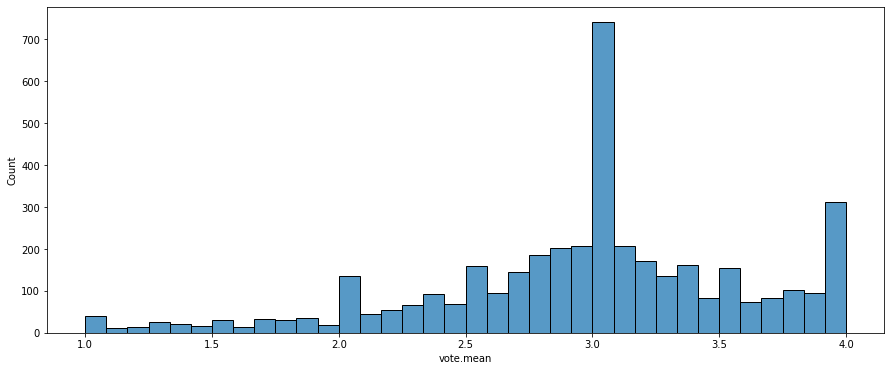

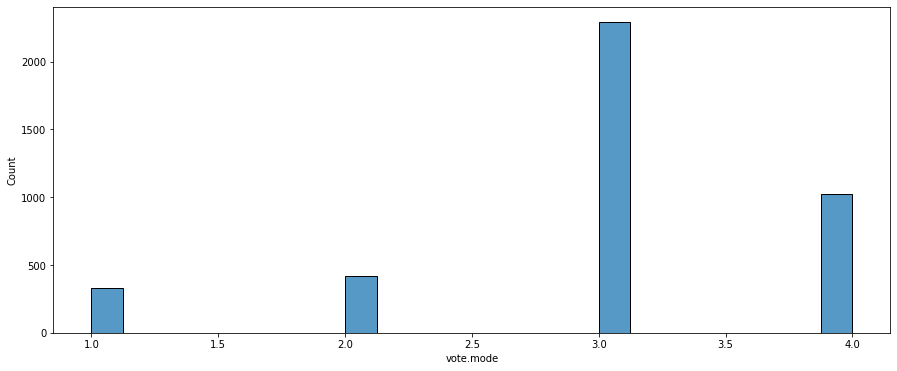

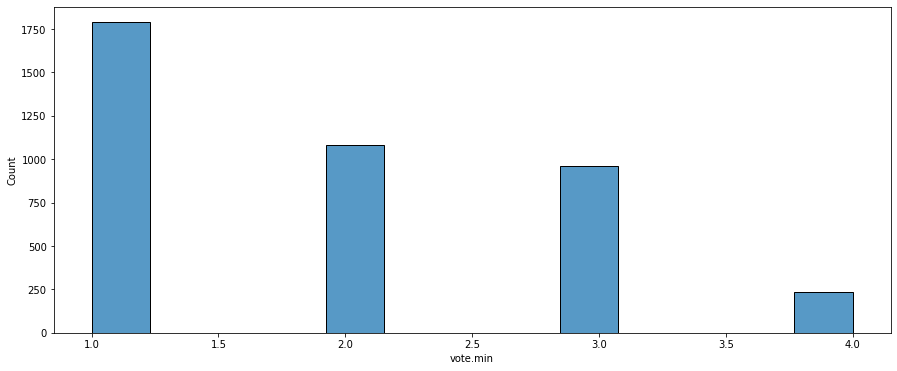

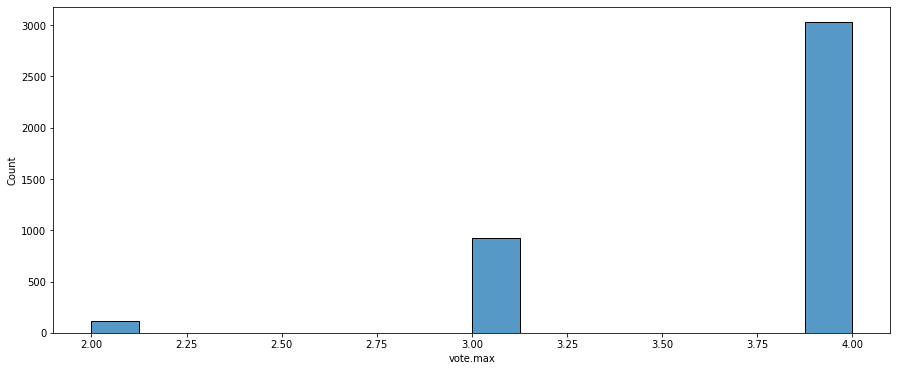

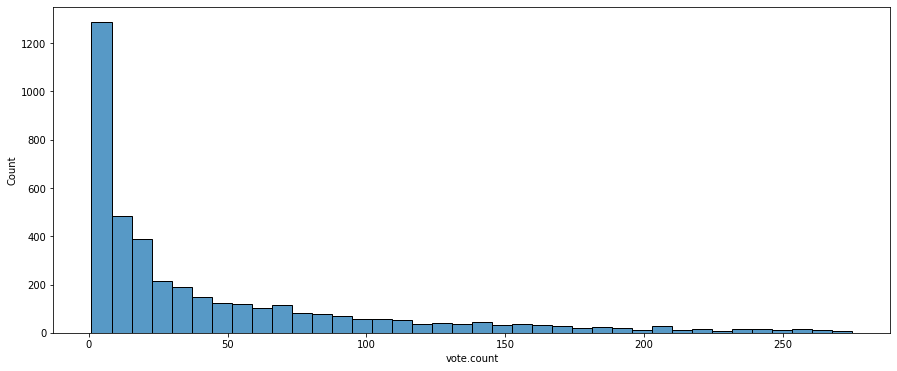

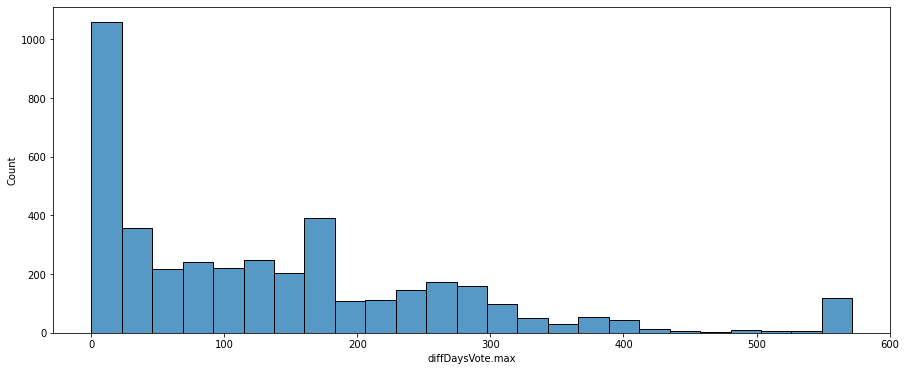

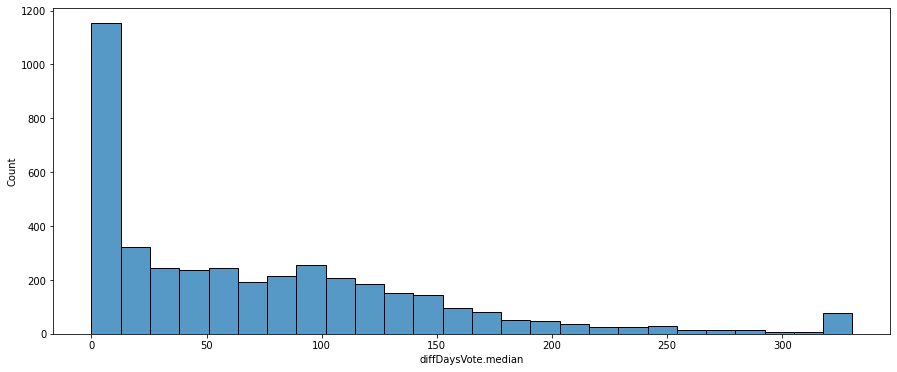

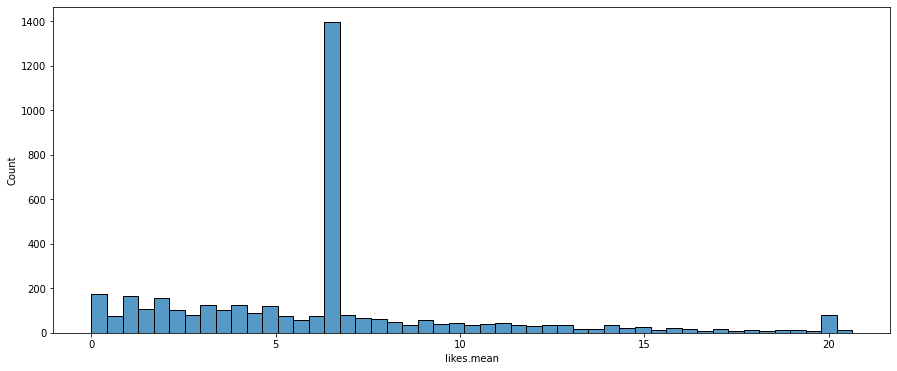

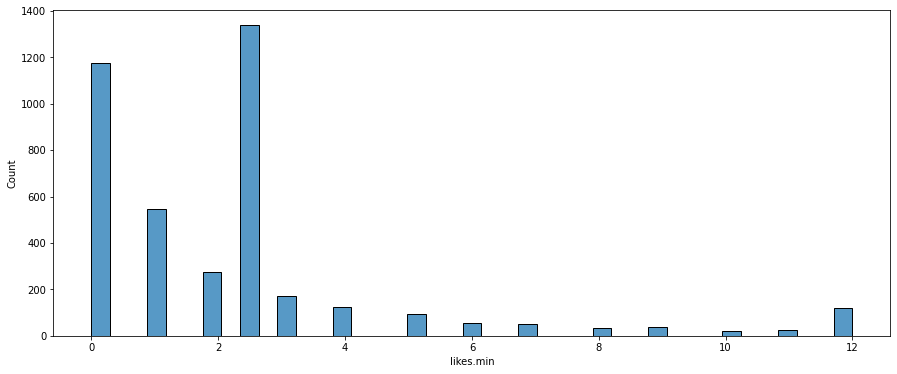

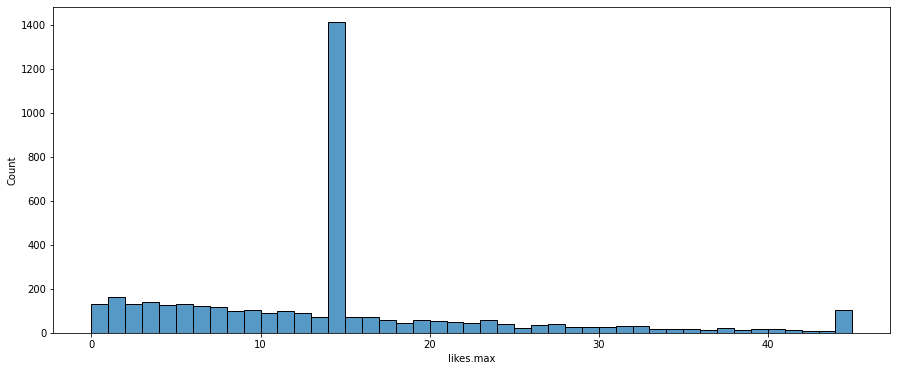

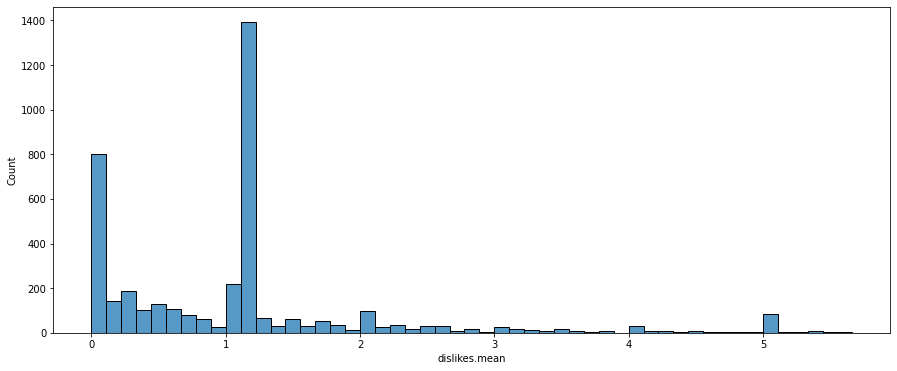

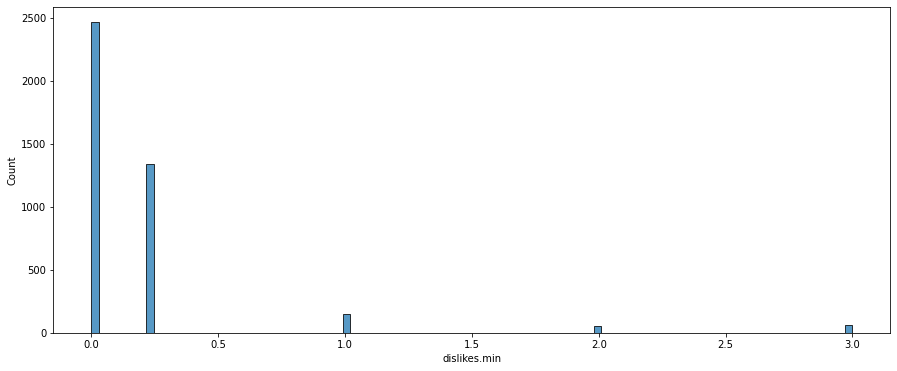

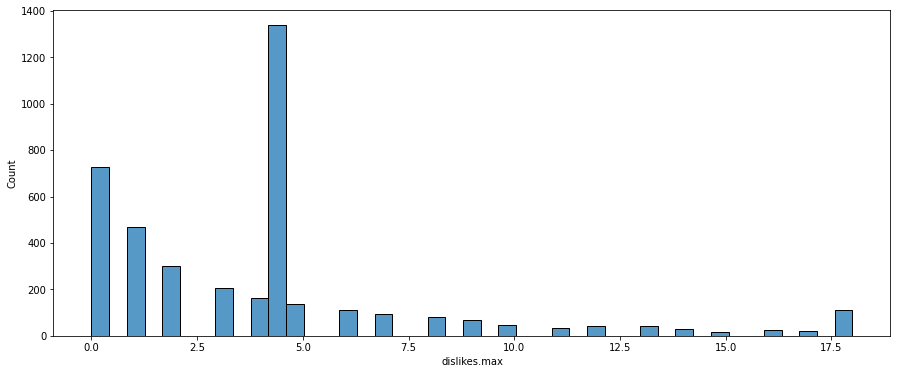

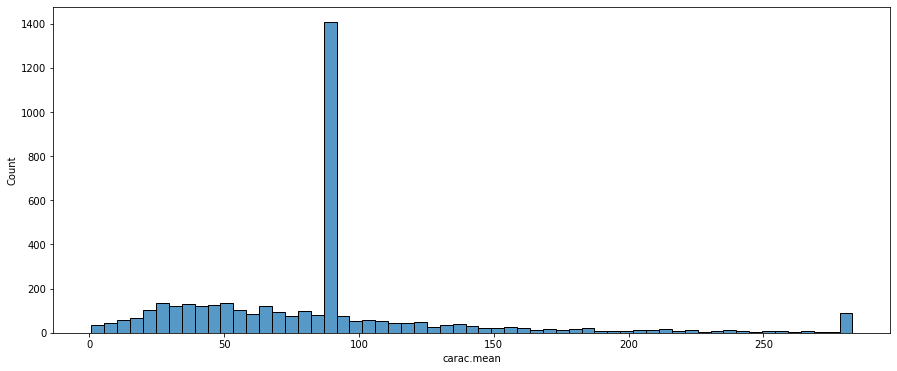

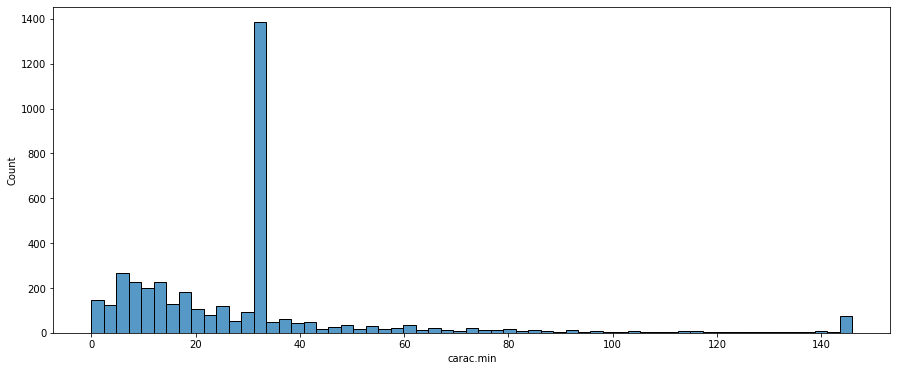

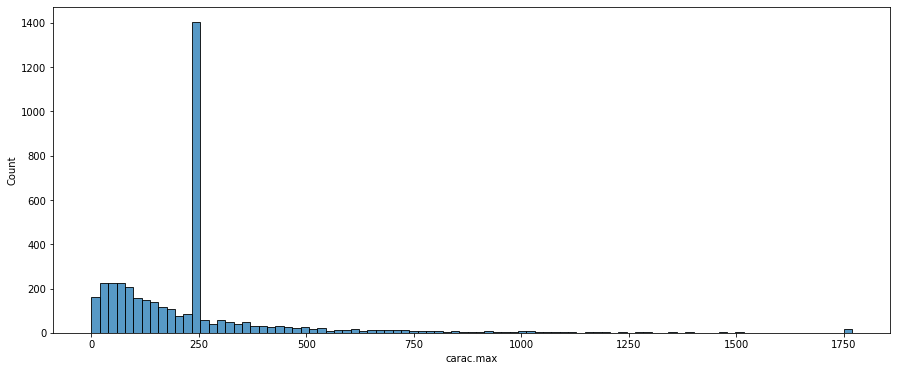

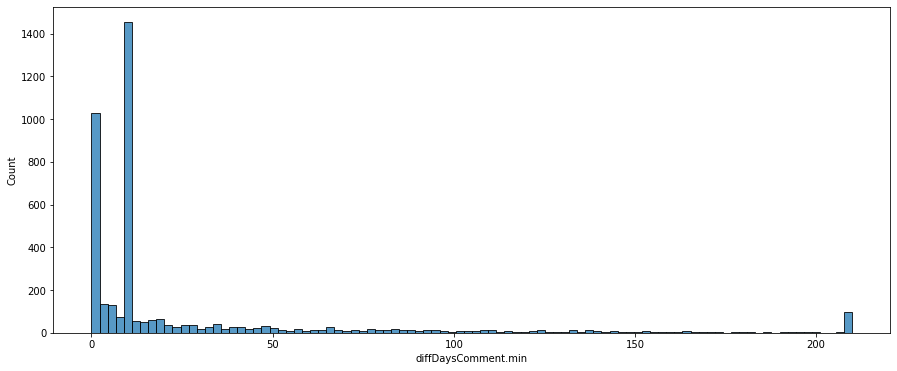

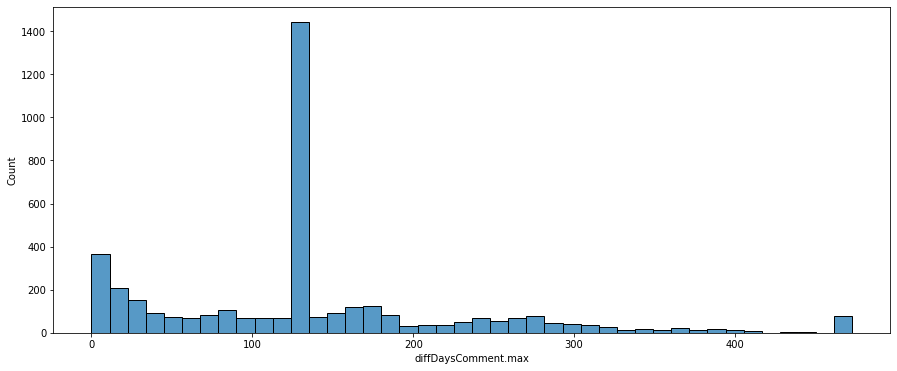

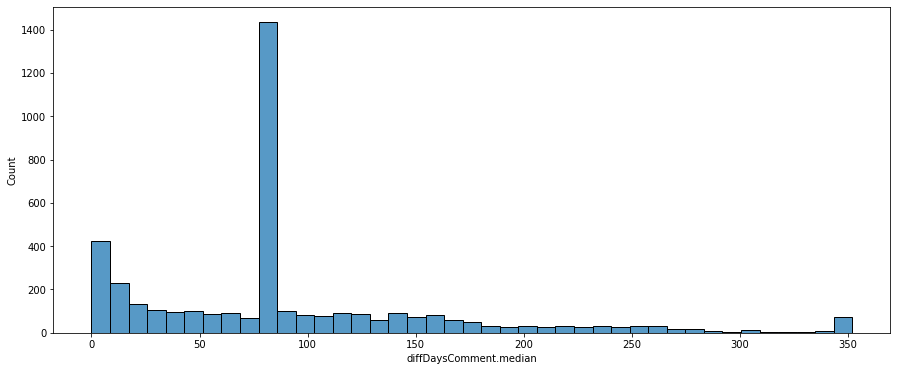

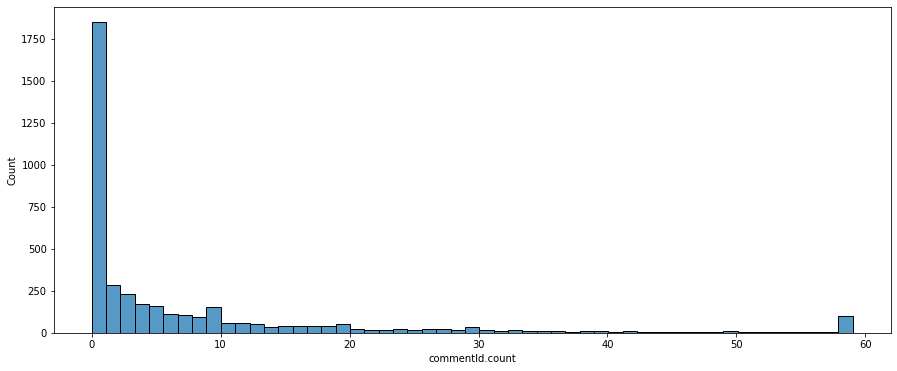

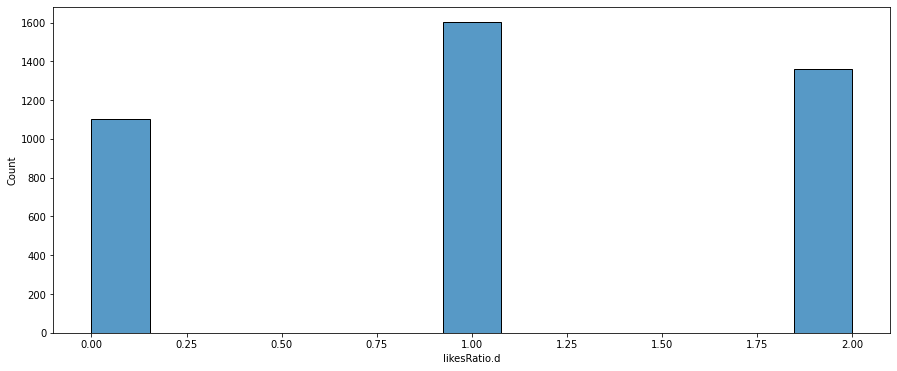

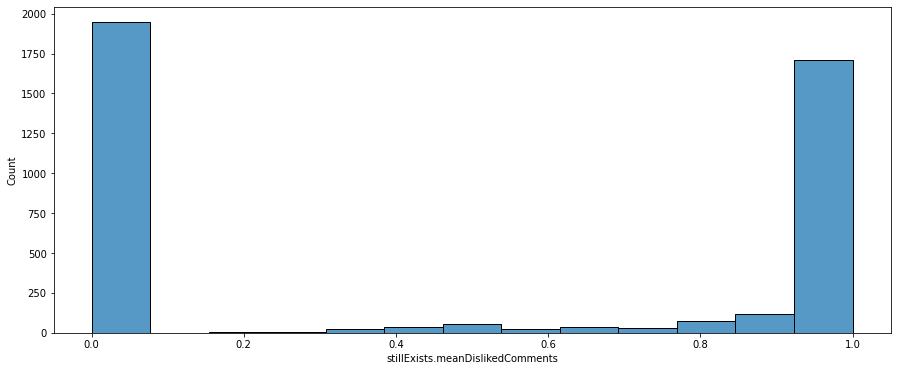

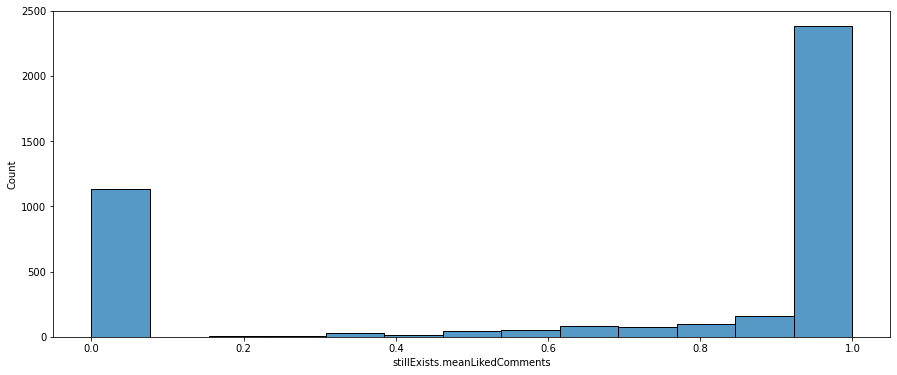

In [215]:
for col in num:
  plt.figure(figsize=(15,6))
  sns.histplot(churn,
                x=col)
  plt.show()

#### b) Muitas variáveis estão com cauda muito longa, aplicar box-cox transformation